Data Preprocessing

Objective: The main objective of this project is to design and implement a robust data
preprocessing system that addresses common challenges such as missing values, outliers,
inconsistent formatting, and noise.
By performing effective data preprocessing, the project aims to enhance the quality, reliability,
and usefulness of the data for machine learning.
Dataset:
https://drive.google.com/file/d/1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_/view?usp=sharing
Key Components to be fulfilled:
1. Data Exploration: (Score : 2)
● Explore the data, list down the unique values in each feature and find its length.
● Perform the statistical analysis and renaming of the columns.
2. Data Cleaning: (Score : 2)
● Find the missing and inappropriate values, treat them appropriately.
● Remove all duplicate rows.
● Find the outliers.
● Replace the value 0 in age as NaN Treat the null values in all columns using any
measures(removing/ replace the values with mean/median/mode) .

3. Data Analysis: (Score : 2)
● Filter the data with age >40 and salary<5000 Plot the chart with age and salary
Count the number of people from each place and represent it visually

4. Data Encoding: (Score : 2)
● Convert categorical variables into numerical representations using techniques
such as one-hot encoding, label encoding, making them suitable for analysis by
machine learning algorithms.
5. Feature Scaling: (Score : 2)
● After the process of encoding, perform the scaling of the features using
standardscaler and minmaxscaler.

In [244]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder 
from sklearn.model_selection import train_test_split 

1. Data Exploration: (Score : 2)
● Explore the data, list down the unique values in each feature and find its length.
● Perform the statistical analysis and renaming of the columns.


In [245]:
employee=pd.read_csv("C:\\Users\\jasmi\\Downloads\\ML Classes\\Assignments\\Employee (1).csv", encoding='latin1')
employee.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [246]:
print(f"unique values in {employee['Gender'].value_counts()}")
print(f"unique values in {employee['Company'].value_counts()}")
print(f"unique values in {employee['Place'].value_counts()}")
print(f"unique values in {employee['Country'].value_counts()}")


unique values in Gender
0    115
1     33
Name: count, dtype: int64
unique values in Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64
unique values in Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64
unique values in Country
India    148
Name: count, dtype: int64


In [247]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


<Axes: ylabel='Salary'>

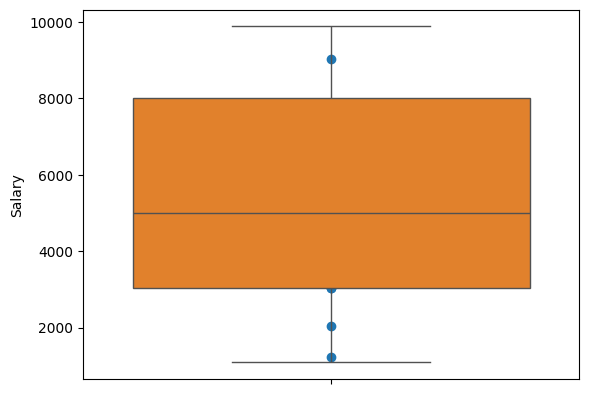

In [248]:
plt.scatter(x=employee['Age'],y=employee['Salary'])
#didnt see any relationship between age and salary
sns.boxplot(data=employee['Salary'])
# there are some outliers in the salary field.

lets consider we need to predict the salary,if thats the case the value is very much essential in Company and Age.we can't fill Comapny name ,
so its better to drop company with null rows .for the age ,group by company name ,we can fill using average age.(to avoid loosing further data)
also no where in the dataset,Gender with 0 is female/male is mentioned(its an essential one) .we have to take an assumption that 115 number of gender with 0 are male and else are female.

In [249]:
employee.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [250]:
employee.rename(columns={'Gender':'Sex'},inplace=True)
employee#Renamed the column Gender to Sex

,Company,Age,Salary,Place,Country,Sex
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


2. Data Cleaning: (Score : 2)
- Find the missing and inappropriate values, treat them appropriately.
- Remove all duplicate rows.
- Find the outliers.
- Replace the value 0 in age as NaN Treat the null values in all columns using any
measures(removing/ replace the values with mean/median/mode) .

In [251]:
#Removing Duplicate rows
employee.duplicated().sum()# there are 4 rows with duplicates .so we can romove those duplicates
employee.drop_duplicates(inplace=True)
employee.shape
#so we have total of 144 rows

(144, 6)

In [252]:
#Missing and in approprate values.
employee.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Sex      144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [253]:
import warnings
warnings.filterwarnings('ignore')
#for Place,14 rows are null.so its better to drop
employee.dropna(subset='Place',inplace=True)
employee.shape
employee['Age'].value_counts()
employee['Age'].replace(0.0,np.nan,inplace=True)
employee['Age'].fillna(employee['Age'].mean(),inplace=True)
employee['Age'].isnull().any()#There is no null values in age field

employee['Salary']=employee['Salary'].fillna(employee.groupby(['Company'])['Salary'].transform('mean'))

In [254]:
employee.head()

,Company,Age,Salary,Place,Country,Sex
0,TCS,20.0,5346.35,Chennai,India,0
1,Infosys,30.0,4945.00,Mumbai,India,0
2,TCS,35.0,2300.00,Calcutta,India,0
3,Infosys,40.0,3000.00,Delhi,India,0
4,TCS,23.0,4000.00,Mumbai,India,0


In [255]:
employee['Company'].value_counts()

Company
TCS                          46
Infosys                      40
CTS                          32
Congnizant                    2
Infosys Pvt Lmt               2
Tata Consultancy Services     1
Name: count, dtype: int64

3. Data Analysis: (Score : 2)
- Filter the data with age >40 and salary<5000 Plot the chart with age and salary
Count the number of people from each place and represent it visually

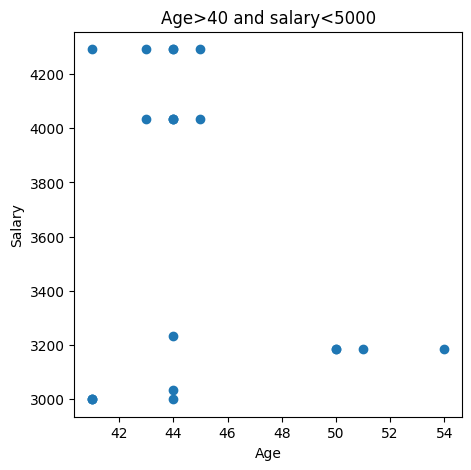

In [256]:
filtered_employee=employee[(employee['Age']>40)&(employee['Salary']<5000)]
plt.figure(figsize=(5,5))
plt.title('Age>40 and salary<5000')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(filtered_employee['Age'],filtered_employee['Salary'])


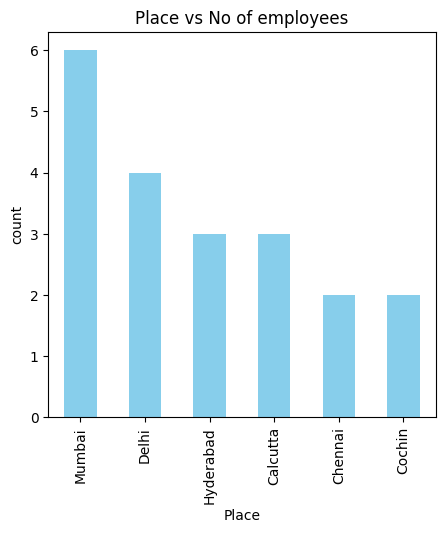

In [257]:
if 'Place' in filtered_employee.columns:
    filtered_employee_place=filtered_employee['Place'].value_counts()
    plt.figure(figsize=(5,5))
    plt.title('Place vs No of employees')
    plt.xlabel('Place')
    plt.ylabel('count')
    filtered_employee_place.plot(kind='bar',color='skyblue')



4. Data Encoding: (Score : 2)
- Convert categorical variables into numerical representations using techniques
such as one-hot encoding, label encoding, making them suitable for analysis by
machine learning algorithms.

In [258]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  123 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   127 non-null    float64
 3   Place    130 non-null    object 
 4   Country  130 non-null    object 
 5   Sex      130 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [259]:
employee['Company'].value_counts()

Company
TCS                          46
Infosys                      40
CTS                          32
Congnizant                    2
Infosys Pvt Lmt               2
Tata Consultancy Services     1
Name: count, dtype: int64

In [260]:
#encoding the categorical columns Company,Place and country,here for this dataset ,appiled label encoding
le=LabelEncoder()
list_data=['Company','Place','Country']
for i in list_data:

    employee[i]=le.fit_transform(employee[i])

employee.head()
    

,Company,Age,Salary,Place,Country,Sex
0,4,20.0,5346.35,2,0,0
1,2,30.0,4945.00,6,0,0
2,4,35.0,2300.00,1,0,0
3,2,40.0,3000.00,4,0,0
4,4,23.0,4000.00,6,0,0


In [261]:


employee_onehot=pd.get_dummies(employee,columns=['Company','Place','Country'],drop_first=True)

In [262]:
employee_onehot.head()

,Age,Salary,Sex,Company_1,Company_2,Company_3,Company_4,Company_5,Company_6,Place_1,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10
0,20.0,5346.35,0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
1,30.0,4945.00,0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.00,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.00,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.00,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


Always for this dataset,labelencode is best

5. Feature Scaling: (Score : 2)
- After the process of encoding, perform the scaling of the features using
standardscaler and minmaxscaler.

In [263]:
ss_scaler=StandardScaler()
mm_scaler=MinMaxScaler()

list_num=['Age','Salary']

employee_std=employee.copy()
employee_std[list_num]=ss_scaler.fit_transform(employee[list_num])

#range -1 ,0,+1

list_num=['Age','Salary']

employee_mm=employee.copy()
employee_mm[list_num]=mm_scaler.fit_transform(employee[list_num])
print(employee_mm.head(10))#range 0 to 1
print(employee_std.head(10))

   Company       Age    Salary  Place  Country  Sex
0        4  0.081081  0.484506      2        0    0
1        2  0.351351  0.438830      6        0    0
2        4  0.486486  0.137817      1        0    0
3        2  0.621622  0.217480      4        0    0
4        4  0.162162  0.331285      6        0    0
5        2  0.408629  0.445089      1        0    0
6        4  0.408629  0.558894      2        0    1
7        2  0.162162  0.672698      6        0    1
8        4  0.459459  0.786503      1        0    1
9        0  0.756757  0.900307      4        0    0
   Company       Age    Salary  Place  Country  Sex
0        4 -1.452569  0.151920      2        0    0
1        2 -0.254007 -0.018793      6        0    0
2        4  0.345274 -1.143831      1        0    0
3        2  0.944555 -0.846089      4        0    0
4        4 -1.093001 -0.420744      6        0    0
5        2  0.000000  0.004601      1        0    0
6        4  0.000000  0.429947      2        0    1
7        2 -